In [154]:
import pandas as pd

In [155]:
import sklearn

In [156]:
import seaborn as sns 

In [157]:
df=pd.read_csv(r"C:\Users\mdimr\Downloads\1569614-1567135-1541251-Pandas_assignment\Pandas_assignment\Pandas_day_2\titanic.csv")

In [158]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,NaN
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,NaN
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,NaN


## 1. Select ['age', 'fare', 'embarked_town', 'gender', 'pclass', 'survived'] cols from titanic dataset from seaborn

In [159]:
selected_columns = ['age', 'fare', 'embarked', 'sex', 'pclass', 'survived']
selected_titanic_data =df[selected_columns]
tdf=selected_titanic_data 
tdf

,age,fare,embarked,sex,pclass,survived
0,22.0,7.2500,S,male,3,0
1,38.0,71.2833,C,female,1,1
2,26.0,7.9250,S,female,3,1
3,35.0,53.1000,S,female,1,1
4,35.0,8.0500,S,male,3,0
...,...,...,...,...,...,...
886,27.0,13.0000,S,male,2,0
887,19.0,30.0000,S,female,1,1
888,NaN,23.4500,S,female,3,0
889,26.0,30.0000,C,male,1,1


## 2. Identify and handle outliers in fare with appropriate technique

In [160]:
import numpy as np

In [161]:
tdf['fare'].isna().sum()

0

<Axes: xlabel='fare', ylabel='Count'>

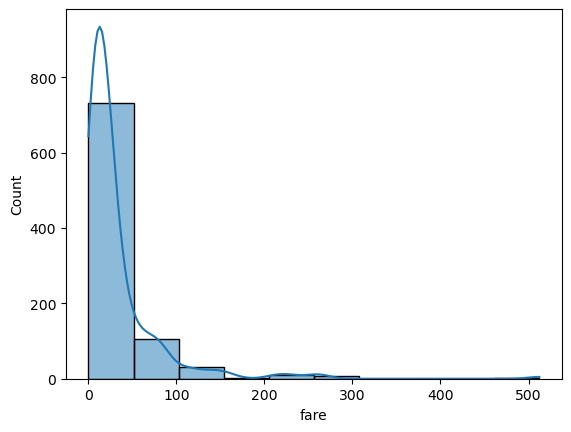

In [162]:
sns.histplot(tdf['fare'],bins=10,kde=True)

## 3. Detecting  Outliers 
### (a)  Detecting Outliers Using IQR Method

In [163]:
# iqr method 
# Calculate the IQR for 'fare'
Q1 = tdf['fare'].quantile(0.25)
Q3 = tdf['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers_iqr = tdf[abs(tdf['fare'] < lower_bound) | (tdf['fare'] > upper_bound)]

# Display outliers
print("\nOutliers identified using IQR:")
print(outliers_iqr[['fare']])



Outliers identified using IQR:
         fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


<Axes: xlabel='fare'>

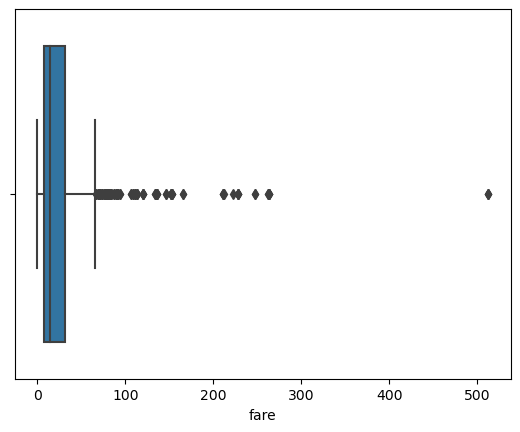

In [164]:
# Original 'fare' box plot
sns.boxplot(x='fare', data=tdf)

In [165]:
lower_bound

-26.724

In [166]:
upper_bound

65.6344

### (b) Handling Outliers 

C:\Users\mdimr\AppData\Local\Temp\ipykernel_13268\4119259534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fare_clipped'] = tdf['fare'].clip(lower=fare_lower_threshold, upper=fare_upper_threshold)


<Axes: xlabel='fare_clipped'>

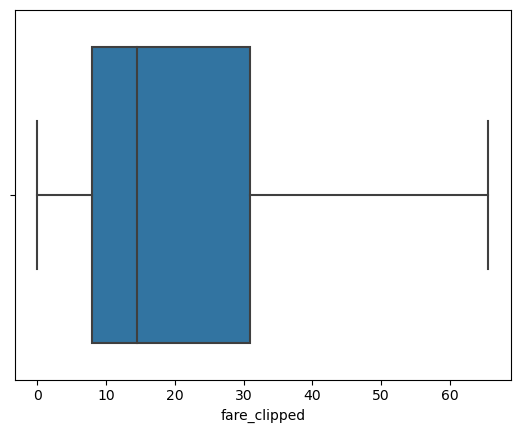

In [167]:
# Define upper and lower thresholds for 'fare' (adjust as needed)
fare_lower_threshold = 0
fare_upper_threshold = 65.6344

# Clip 'fare' values to the defined thresholds
tdf['fare_clipped'] = tdf['fare'].clip(lower=fare_lower_threshold, upper=fare_upper_threshold)



# Clipped 'fare' box plot
sns.boxplot(x='fare_clipped', data=tdf)


<Axes: xlabel='fare_clipped', ylabel='Count'>

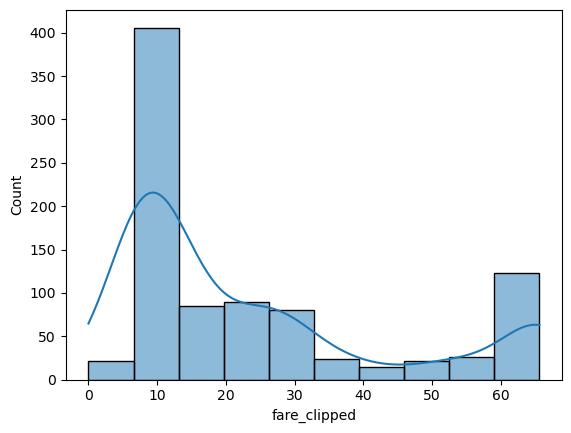

In [168]:
sns.histplot(tdf['fare_clipped'],bins=10,kde=True)

## 4.  Handle Missing Values In Age col


In [169]:
tdf['age'].isna().sum()

177

### (a) Checking Imputating techniques to find appropriate method for age column

### Distribution of age column

<Axes: xlabel='age', ylabel='Count'>

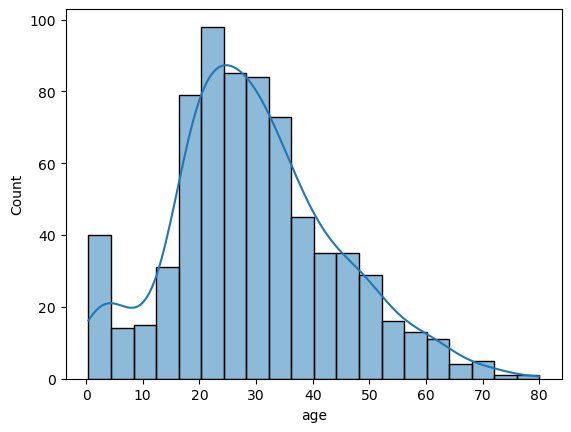

In [170]:
sns.histplot(df['age'],bins=20,kde=True)

**Note** :  After Imputating missing value the resultant column  distribution should be same or close to original age distribution

## Imputating missing values with mean 

In [171]:
tdf1 = tdf[selected_columns].copy()  # Create a copy to avoid the warning

# Impute missing values in 'age' with the mean
mean_age = tdf1['age'].mean()
tdf1.loc[:, 'age_imputed_mean'] = tdf1['age'].fillna(mean_age)

<Axes: xlabel='age_imputed_mean', ylabel='Count'>

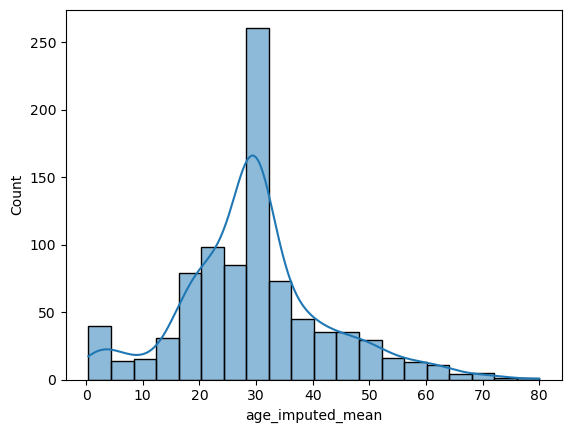

In [172]:
sns.histplot(tdf1['age_imputed_mean'], bins=20,kde=True)

### Imputating missing values with median

In [173]:
tdf2=tdf[selected_columns].copy()

In [174]:
tdf2.loc[:, 'age'] = tdf2['age'].fillna(tdf2.groupby('sex')['age'].transform('median'))


<Axes: xlabel='age', ylabel='Count'>

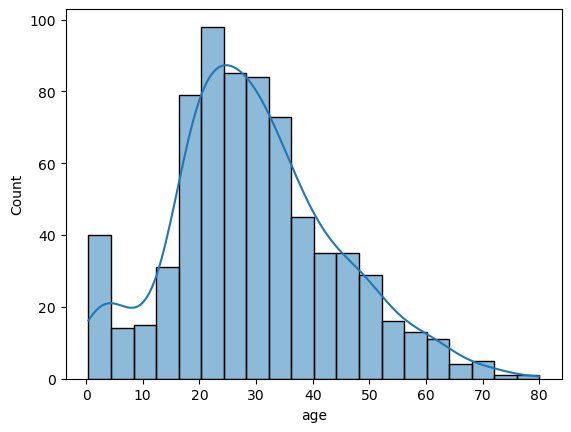

In [175]:
sns.histplot(tdf1['age'], bins=20,kde=True)

## Imputating missing values with 0

In [176]:
tdf3=tdf[selected_columns].copy()

In [177]:
tdf3.fillna(0, inplace=True)


<Axes: xlabel='age', ylabel='Count'>

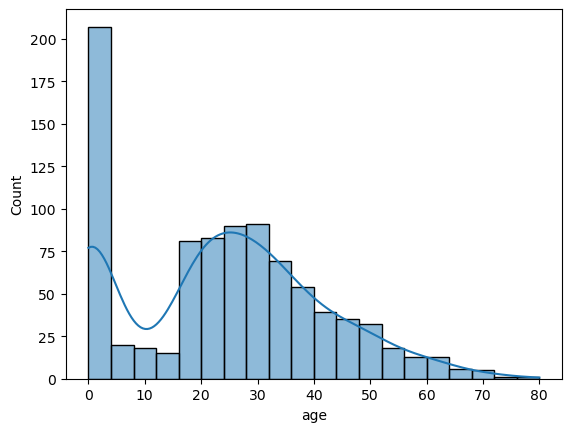

In [178]:
sns.histplot(tdf3['age'], bins=20,kde=True)

## Imputating missing values with bfill and ffill

In [179]:
tdf4=tdf[selected_columns].copy()

# Forward fill missing values
tdf4['age'].fillna(method='ffill', inplace=True)



<Axes: xlabel='age', ylabel='Count'>

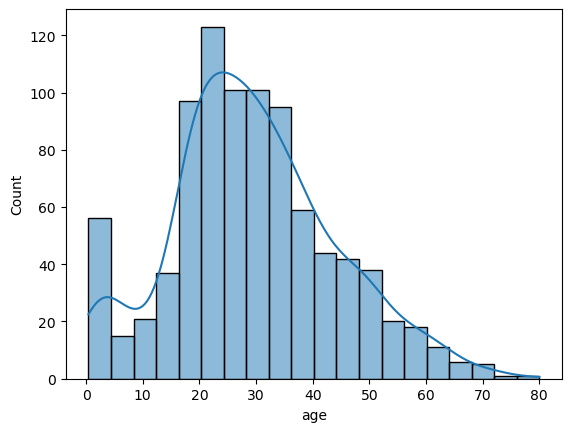

In [180]:
sns.histplot(tdf4['age'], bins=20,kde=True)

In [181]:
tdf5=tdf[selected_columns].copy()
tdf5['age'].fillna(method='bfill', inplace=True)

<Axes: xlabel='age', ylabel='Count'>

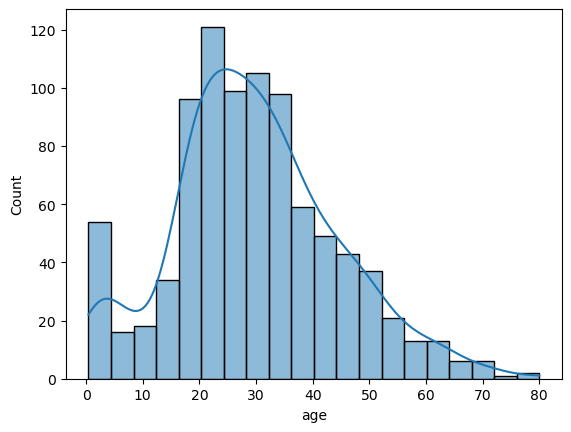

In [182]:
sns.histplot(tdf5['age'], bins=20,kde=True)

* here median distribution is very close to original age distribution column 
* Hence imputating missing values with median 

## Handling Missing values with median

## Imputating missing values with median directly on original age column 

In [183]:
tdf.isna().sum()

age             177
fare              0
embarked          2
sex               0
pclass            0
survived          0
fare_clipped      0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

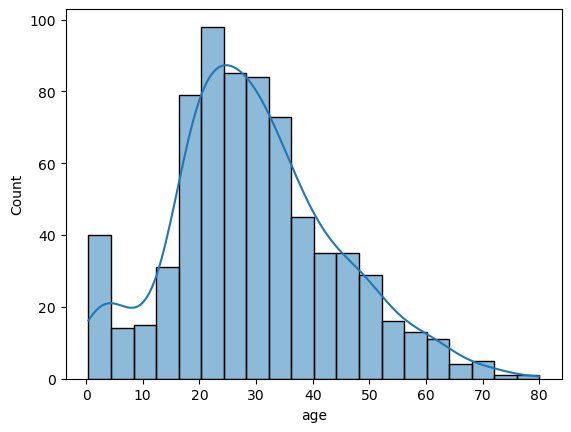

In [184]:
sns.histplot(tdf['age'],bins=20,kde=True)

In [185]:
tdf2.loc[:, 'age'] = tdf2['age'].fillna(tdf2.groupby('sex')['age'].transform('median'))


<Axes: xlabel='age', ylabel='Count'>

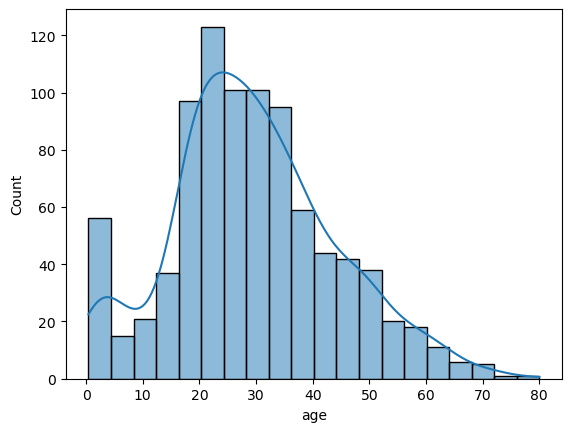

In [186]:
sns.histplot(tdf4['age'], bins=20,kde=True)

#### the distribution after imputing missing values is same as original distribution of age column

## 5.  Univariant and Bivariant Analysis

## (a) Univariate Analysis (Non-Visualization)

### Summary statistics for numerical columns

In [187]:
tdf

,age,fare,embarked,sex,pclass,survived,fare_clipped
0,22.0,7.2500,S,male,3,0,7.2500
1,38.0,71.2833,C,female,1,1,65.6344
2,26.0,7.9250,S,female,3,1,7.9250
3,35.0,53.1000,S,female,1,1,53.1000
4,35.0,8.0500,S,male,3,0,8.0500
...,...,...,...,...,...,...,...
886,27.0,13.0000,S,male,2,0,13.0000
887,19.0,30.0000,S,female,1,1,30.0000
888,NaN,23.4500,S,female,3,0,23.4500
889,26.0,30.0000,C,male,1,1,30.0000


In [188]:
numeric_summary = tdf.describe()


In [189]:
numeric_summary 

,age,fare,pclass,survived,fare_clipped
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642,0.383838,24.046813
std,14.526497,49.693429,0.836071,0.486592,20.481625
min,0.420000,0.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,2.000000,0.000000,7.910400
50%,28.000000,14.454200,3.000000,0.000000,14.454200
75%,38.000000,31.000000,3.000000,1.000000,31.000000
max,80.000000,512.329200,3.000000,1.000000,65.634400


### Summary statistics for categorical columns


In [190]:
categorical_summary = tdf.describe(include='object')

In [191]:
categorical_summary

,embarked,sex
count,889,891
unique,3,2
top,S,male
freq,644,577


## Univariate Analysis (Visualization)

### Distribution of 'age' using a histogram

<Axes: xlabel='age', ylabel='Count'>

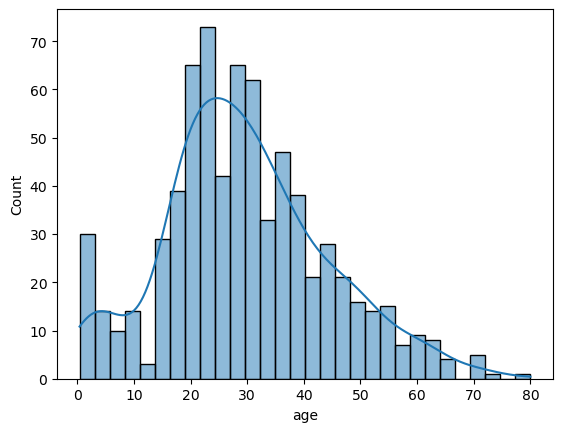

In [192]:
sns.histplot(tdf['age'], bins=30, kde=True)

### Count plot for 'sex'

<Axes: xlabel='sex', ylabel='count'>

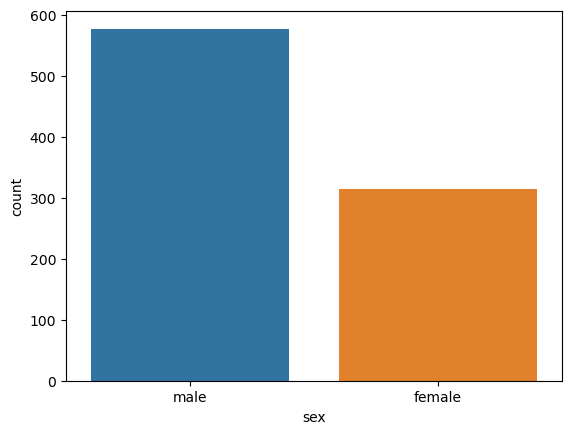

In [193]:
sns.countplot(x='sex', data=tdf)

### Distribution of 'fare' using a histogram

<Axes: xlabel='fare', ylabel='Count'>

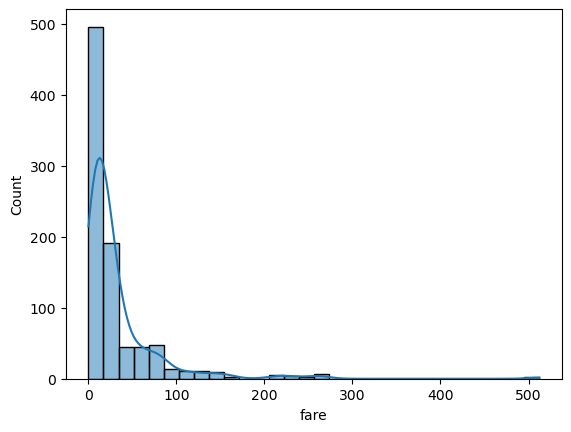

In [194]:
sns.histplot(tdf['fare'], bins=30, kde=True)

### Count plot for 'pclass'

<Axes: xlabel='pclass', ylabel='count'>

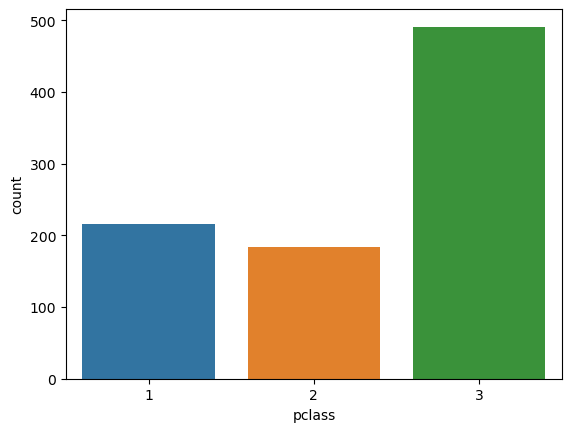

In [195]:
sns.countplot(x='pclass', data=tdf)

### Count plot for 'survived'

<Axes: xlabel='survived', ylabel='count'>

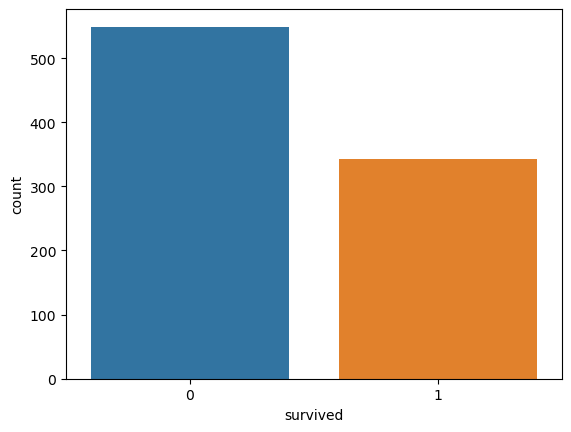

In [196]:
sns.countplot(x='survived', data=tdf)

### Count plot for 'embarked'

<Axes: xlabel='embarked', ylabel='count'>

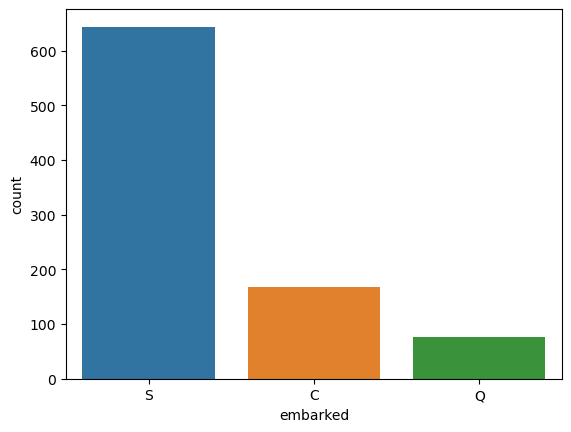

In [197]:
sns.countplot(x='embarked', data=tdf)

## Bivariate Analysis (Visualization)
###   Survival vs. Passenger Class

<Axes: xlabel='survived', ylabel='count'>

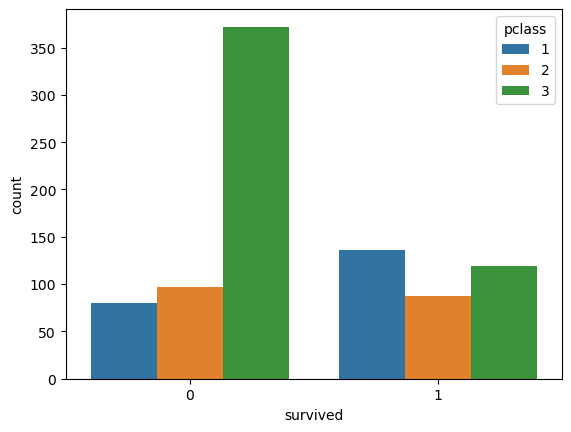

In [204]:
sns.countplot(x='survived', hue='pclass', data=tdf)

###  Survival vs. Gender

<Axes: xlabel='survived', ylabel='count'>

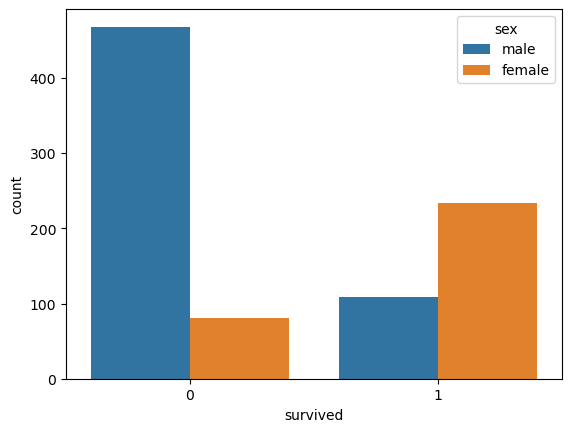

In [199]:
sns.countplot(x='survived', hue='sex', data=tdf)


###  Survival vs. Age

<Axes: xlabel='age', ylabel='Count'>

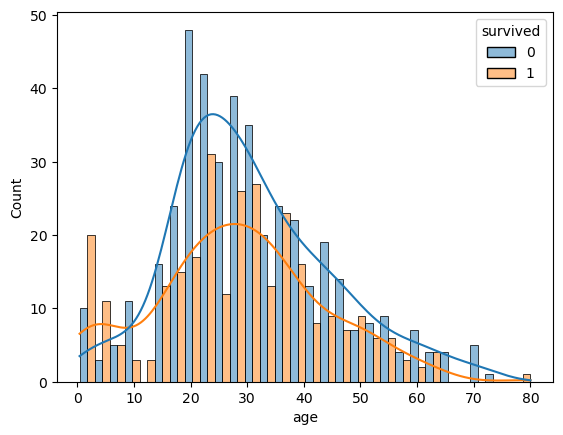

In [200]:
sns.histplot(x='age', hue='survived', data=tdf, bins=30, kde=True,multiple='dodge')

### Survival vs. Fare

<Axes: xlabel='fare', ylabel='Count'>

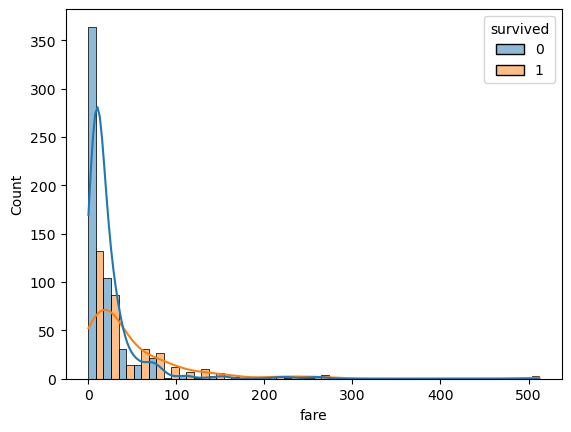

In [201]:
sns.histplot(x='fare', hue='survived', data=tdf, bins=30, kde=True, multiple='dodge')

### Passenger Class vs. Age 

<Axes: xlabel='age', ylabel='Count'>

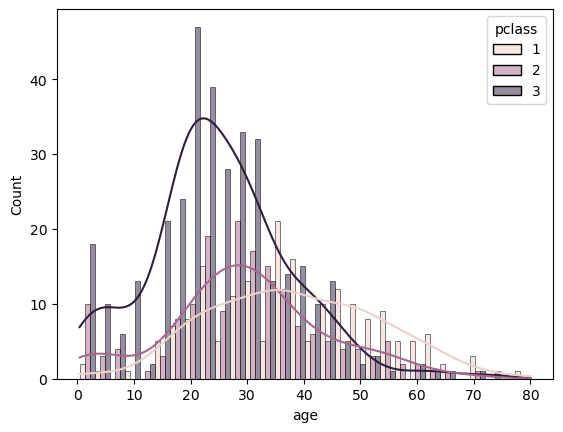

In [202]:
sns.histplot(x='age', hue='pclass', data=tdf, bins=30, kde=True,multiple='dodge')